## COVID & RARs

In [1]:
import numpy as np
import pandas as pd
import os
import datetime as dt

d = pd.read_csv('/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/sleep_diaries/WearableAssessment-SleepSurveys_DATA_2020-08-08_1654.csv', parse_dates = ['session1_date'])
d['session1_date'] = d['session1_date'].ffill()
d['age_group'] = d['age_group'].ffill()
d['COVID'] = np.where(d['session1_date'] <= dt.datetime.strptime('03/14/2020', '%m/%d/%Y'), 'Pre', 'Post')
d['age_group'] = np.where(d['age_group'] == 2.0, "Older Adults", "Younger Adults")
d = d[d['redcap_event_name'].str.contains('day')]
d

,session1_date,record_id,redcap_event_name,age_group,gender,global_psqi,sleep_diary_date,bed_time_0fbbb9,sleep_time,sleep_minutes,...,activities___20,activities___21,activities___22,activities___23,activities___24,activities___25,activities___26,activities___27,daily_sleep_survey_complete,COVID
2,2019-10-24 17:31:00,11,day_1_arm_1,Younger Adults,NaN,NaN,NaN,20:30,20:45,10.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,Pre
3,2019-10-24 17:31:00,11,day_2_arm_1,Younger Adults,NaN,NaN,NaN,22:00,22:45,5.0,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0,Pre
4,2019-10-24 17:31:00,11,day_3_arm_1,Younger Adults,NaN,NaN,NaN,22:10,22:15,15.0,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0,Pre
5,2019-10-24 17:31:00,11,day_4_arm_1,Younger Adults,NaN,NaN,NaN,23:45,00:05,5.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,Pre
6,2019-10-24 17:31:00,11,day_5_arm_1,Younger Adults,NaN,NaN,NaN,23:15,23:27,3.0,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0,Pre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,2020-08-04 10:00:00,127,day_4_arm_1,Older Adults,NaN,NaN,2020-08-08,22:50,23:15,10.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,Post
466,2020-08-04 09:30:00,129,day_1_arm_1,Older Adults,NaN,NaN,2020-08-05,22:45,11:00,15.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,Post
467,2020-08-04 09:30:00,129,day_2_arm_1,Older Adults,NaN,NaN,2020-08-06,23:00,23:10,10.0,...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,Post
468,2020-08-04 09:30:00,129,day_3_arm_1,Older Adults,NaN,NaN,2020-08-07,23:00,23:20,10.0,...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,Post


In [2]:
cols = pd.read_csv('/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/sleep_diaries/WearableAssessment-SleepSurveys_DATA_LABELS_2020-08-08_1643.csv').columns
cols = cols[cols.str.contains('Which of the following did you do yesterday?')].tolist()
cols = [i.split('choice=', 1)[1] for i in cols]
cols = [i.split(')', 1)[0] for i in cols]
cols = ['record_id', 'age_group'] + cols + ['Sadness','Happiness','Stress','Rumination','Alcohol', 'COVID']
cols

['record_id',
 'age_group',
 'Attending classes, meetings',
 'Being physically animated, moving around',
 'Browsing the internet',
 'Commuting, traveling',
 'Doing a favor, helping others',
 'Doing household chores',
 'Doing nothing (sitting around, daydreaming',
 'Drinking, eating',
 'Exercising, physical activity, sports',
 'Hygienic activities (grooming, showering',
 'Listening to music',
 'Playing a game',
 'Reading',
 'Resting, napping',
 'Running errands',
 'Studying',
 'Shopping',
 'Spiritual, religious activity',
 'Talking, socializing in person',
 'Texting, talking on the phone',
 'Thinking, reflecting',
 'Using social media',
 'Using a computer',
 'Walking, running',
 'Watching TV, movies',
 'Working',
 'None of the above',
 'Sadness',
 'Happiness',
 'Stress',
 'Rumination',
 'Alcohol',
 'COVID']

In [3]:
d = d.filter(regex = 'record_id|age_group|COVID|activities*|sad|happy|stress_a11e49|ruminate|alcoholic_drinks')
d.columns = cols
d

,record_id,age_group,"Attending classes, meetings","Being physically animated, moving around",Browsing the internet,"Commuting, traveling","Doing a favor, helping others",Doing household chores,"Doing nothing (sitting around, daydreaming","Drinking, eating",...,"Walking, running","Watching TV, movies",Working,None of the above,Sadness,Happiness,Stress,Rumination,Alcohol,COVID
2,11,Younger Adults,NaN,2.0,87.0,6.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,Pre
3,11,Younger Adults,NaN,0.0,89.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,Pre
4,11,Younger Adults,NaN,0.0,93.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,Pre
5,11,Younger Adults,NaN,0.0,98.0,0.0,2.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,Pre
6,11,Younger Adults,NaN,0.0,92.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,Pre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,127,Older Adults,1.0,36.0,50.0,22.0,25.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,Post
466,129,Older Adults,1.0,43.0,28.0,18.0,20.0,0.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,Post
467,129,Older Adults,1.0,43.0,38.0,27.0,5.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,Post
468,129,Older Adults,NaN,27.0,37.0,7.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,Post


In [4]:
df = d.groupby(['record_id', 'age_group', 'COVID'], group_keys = ['age_group', 'COVID']).mean()
df = df.reset_index()
df

,record_id,age_group,COVID,"Attending classes, meetings","Being physically animated, moving around",Browsing the internet,"Commuting, traveling","Doing a favor, helping others",Doing household chores,"Doing nothing (sitting around, daydreaming",...,Using a computer,"Walking, running","Watching TV, movies",Working,None of the above,Sadness,Happiness,Stress,Rumination,Alcohol
0,11,Younger Adults,Pre,NaN,0.692308,96.384615,3.076923,0.153846,0.000000,0.461538,...,0.000000,1.000000,1.000000,0.000000,0.076923,0.923077,0.923077,0.538462,1.000000,0.0
1,12,Younger Adults,Pre,1.500000,5.857143,55.142857,49.500000,0.000000,0.642857,0.285714,...,0.142857,0.428571,0.000000,0.071429,0.857143,1.000000,0.571429,0.571429,0.285714,0.0
2,14,Younger Adults,Pre,2.000000,43.416667,52.000000,61.916667,51.916667,0.000000,0.416667,...,0.000000,0.583333,0.250000,0.083333,0.583333,0.583333,0.333333,1.000000,0.416667,0.0
3,16,Younger Adults,Pre,5.714286,37.785714,53.857143,43.214286,4.571429,0.571429,0.071429,...,0.000000,0.857143,0.857143,0.071429,1.000000,0.928571,0.857143,0.928571,0.714286,0.0
4,23,Younger Adults,Pre,3.333333,48.714286,54.928571,65.928571,65.642857,0.785714,0.500000,...,0.000000,0.214286,0.714286,0.142857,0.142857,0.428571,0.214286,0.285714,0.000000,0.0
5,24,Younger Adults,Pre,NaN,42.230769,67.846154,59.692308,28.000000,0.769231,0.923077,...,0.076923,1.000000,1.000000,0.846154,0.923077,0.769231,0.923077,0.692308,0.000000,0.0
6,25,Younger Adults,Pre,NaN,28.642857,70.714286,68.785714,33.142857,0.428571,0.857143,...,0.000000,0.857143,0.928571,0.000000,0.928571,0.857143,0.071429,0.857143,0.000000,0.0
7,33,Younger Adults,Pre,1.000000,31.692308,64.846154,51.615385,27.461538,0.615385,0.692308,...,0.000000,0.615385,0.846154,0.615385,0.923077,1.000000,0.923077,1.000000,0.692308,0.0
8,35,Younger Adults,Pre,NaN,47.750000,65.750000,45.333333,28.166667,0.500000,1.000000,...,0.666667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.416667,0.000000,0.0
9,38,Younger Adults,Pre,NaN,17.266667,65.866667,28.733333,6.933333,0.666667,0.866667,...,0.000000,1.000000,0.933333,0.400000,1.000000,0.533333,1.000000,0.800000,0.333333,0.0


In [5]:
ya = df[df['age_group'] == "Younger Adults"]
oa = df[df['age_group'] == "Older Adults"]

In [6]:
ya

,record_id,age_group,COVID,"Attending classes, meetings","Being physically animated, moving around",Browsing the internet,"Commuting, traveling","Doing a favor, helping others",Doing household chores,"Doing nothing (sitting around, daydreaming",...,Using a computer,"Walking, running","Watching TV, movies",Working,None of the above,Sadness,Happiness,Stress,Rumination,Alcohol
0,11,Younger Adults,Pre,NaN,0.692308,96.384615,3.076923,0.153846,0.000000,0.461538,...,0.000000,1.000000,1.000000,0.000000,0.076923,0.923077,0.923077,0.538462,1.000000,0.0
1,12,Younger Adults,Pre,1.500000,5.857143,55.142857,49.500000,0.000000,0.642857,0.285714,...,0.142857,0.428571,0.000000,0.071429,0.857143,1.000000,0.571429,0.571429,0.285714,0.0
2,14,Younger Adults,Pre,2.000000,43.416667,52.000000,61.916667,51.916667,0.000000,0.416667,...,0.000000,0.583333,0.250000,0.083333,0.583333,0.583333,0.333333,1.000000,0.416667,0.0
3,16,Younger Adults,Pre,5.714286,37.785714,53.857143,43.214286,4.571429,0.571429,0.071429,...,0.000000,0.857143,0.857143,0.071429,1.000000,0.928571,0.857143,0.928571,0.714286,0.0
4,23,Younger Adults,Pre,3.333333,48.714286,54.928571,65.928571,65.642857,0.785714,0.500000,...,0.000000,0.214286,0.714286,0.142857,0.142857,0.428571,0.214286,0.285714,0.000000,0.0
5,24,Younger Adults,Pre,NaN,42.230769,67.846154,59.692308,28.000000,0.769231,0.923077,...,0.076923,1.000000,1.000000,0.846154,0.923077,0.769231,0.923077,0.692308,0.000000,0.0
6,25,Younger Adults,Pre,NaN,28.642857,70.714286,68.785714,33.142857,0.428571,0.857143,...,0.000000,0.857143,0.928571,0.000000,0.928571,0.857143,0.071429,0.857143,0.000000,0.0
7,33,Younger Adults,Pre,1.000000,31.692308,64.846154,51.615385,27.461538,0.615385,0.692308,...,0.000000,0.615385,0.846154,0.615385,0.923077,1.000000,0.923077,1.000000,0.692308,0.0
8,35,Younger Adults,Pre,NaN,47.750000,65.750000,45.333333,28.166667,0.500000,1.000000,...,0.666667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.416667,0.000000,0.0
9,38,Younger Adults,Pre,NaN,17.266667,65.866667,28.733333,6.933333,0.666667,0.866667,...,0.000000,1.000000,0.933333,0.400000,1.000000,0.533333,1.000000,0.800000,0.333333,0.0


In [7]:
ya.drop(['record_id', 'age_group'], axis = 1).groupby('COVID').mean()

,"Attending classes, meetings","Being physically animated, moving around",Browsing the internet,"Commuting, traveling","Doing a favor, helping others",Doing household chores,"Doing nothing (sitting around, daydreaming","Drinking, eating","Exercising, physical activity, sports","Hygienic activities (grooming, showering",...,Using a computer,"Walking, running","Watching TV, movies",Working,None of the above,Sadness,Happiness,Stress,Rumination,Alcohol
COVID,,,,,,,,,,,,,,,,,,,,,
Pre,2.363946,30.882152,65.331654,47.368836,27.107122,0.509854,0.588128,0.851235,0.583438,0.220461,...,0.149406,0.774878,0.751325,0.398589,0.738031,0.809884,0.653932,0.65254,0.306876,0.0


In [8]:
import matplotlib.pyplot as plt

ya.drop(['record_id', 'age_group'], axis = 1).drop(['Sadness', 'Happiness', 'Stress', 'Rumination', 'Alcohol'], axis=1).groupby('COVID').mean().plot.bar(figsize = (10, 10), width = 5)

In [9]:
oa.drop(['record_id', 'age_group'], axis = 1).groupby('COVID').mean()

,"Attending classes, meetings","Being physically animated, moving around",Browsing the internet,"Commuting, traveling","Doing a favor, helping others",Doing household chores,"Doing nothing (sitting around, daydreaming","Drinking, eating","Exercising, physical activity, sports","Hygienic activities (grooming, showering",...,Using a computer,"Walking, running","Watching TV, movies",Working,None of the above,Sadness,Happiness,Stress,Rumination,Alcohol
COVID,,,,,,,,,,,,,,,,,,,,,
Post,2.511364,13.928716,68.394589,20.801443,9.652742,0.035714,0.753102,0.861833,0.244589,0.142857,...,0.250000,0.380303,0.621861,0.260245,0.269481,0.877633,0.742063,0.565368,0.057143,0.0
Pre,1.111111,9.363095,69.209890,24.975000,24.164286,0.196429,0.894048,0.666667,0.597619,0.177381,...,0.053571,0.796429,0.763095,0.490476,0.232143,0.628571,0.722619,0.877381,0.000000,0.0


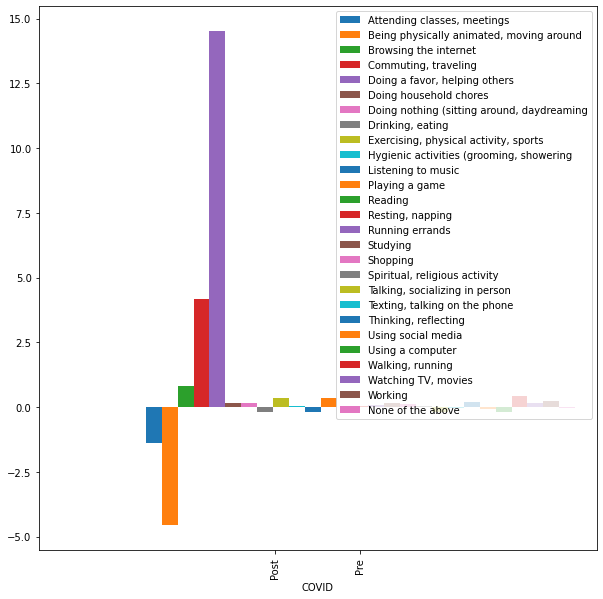

In [10]:
oa.drop(['record_id', 'age_group'], axis = 1).drop(['Sadness', 'Happiness', 'Stress', 'Rumination', 'Alcohol'], axis=1).groupby('COVID').mean().diff().plot.bar(figsize = (10, 10), width = 5)

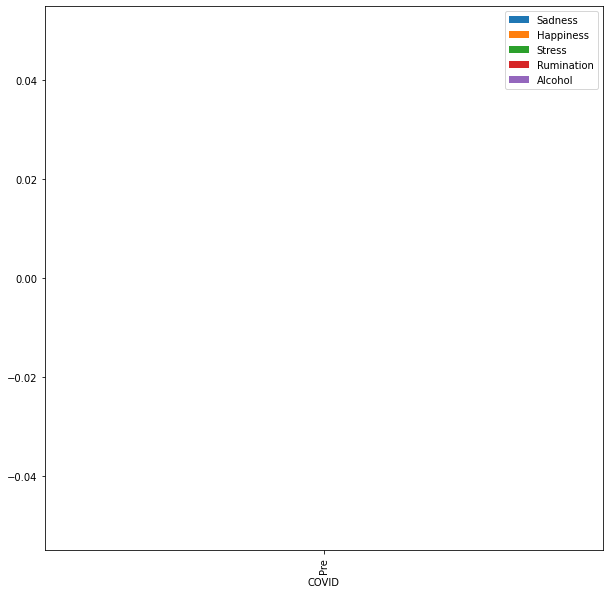

In [11]:
ya.drop(['record_id', 'age_group'], axis = 1).filter(['Sadness', 'Happiness', 'Stress', 'Rumination', 'Alcohol', 'COVID']).groupby('COVID').mean().diff().plot.bar(figsize = (10, 10), width = 5)

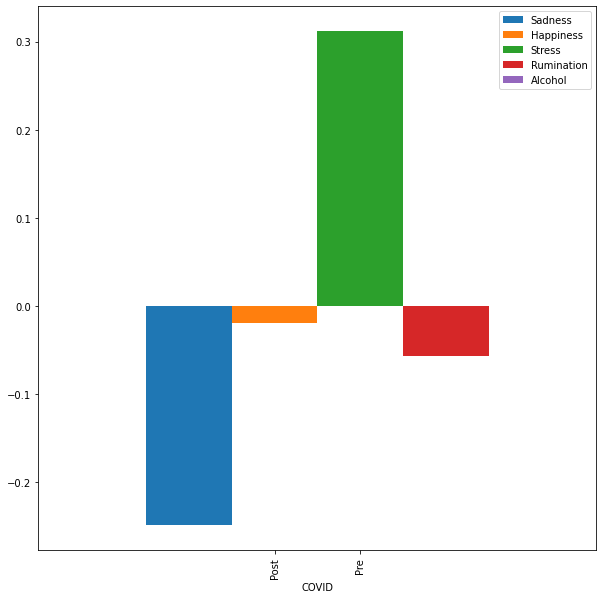

In [12]:
oa.drop(['record_id', 'age_group'], axis = 1).filter(['Sadness', 'Happiness', 'Stress', 'Rumination', 'Alcohol', 'COVID']).groupby('COVID').mean().diff().plot.bar(figsize = (10, 10), width = 5)

## Rest-activity measures

In [13]:
from pathlib import Path

home_dir = str(Path.home())
data_dir = os.path.join(home_dir, 'Box/CogNeuroLab/Wearables/data/')

cr_act = pd.read_csv(data_dir + 'actiwatch/cr_act.csv')
cr_fit = pd.read_csv(data_dir + 'fitbit/cr_fit.csv')

In [14]:
cr_act

,Unnamed: 0,actmin_7,amp_7,alpha_7,beta_7,phi_7,actmin_8,amp_8,alpha_8,beta_8,...,actmin_9,amp_9,alpha_9,beta_9,phi_9,actmin_10,amp_10,alpha_10,beta_10,phi_10
0,10011,2.432565,-2.447323,14.409872,21.201700,92.880844,1.048527,1.820719,0.768953,-14.117220,...,1.138832,1.751524,0.769270,-13.078016,2.640273,1.224985,1.679375,0.771681,-13.104473,2.647754
1,10012,1.378764,1.292044,-0.678648,27.546799,-7.280237,1.474886,0.934578,6.984927,-9.156320,...,2.125595,0.341217,4.515416,-8.367047,-9.001245,1.176810,1.344468,5.442158,-8.101281,-18.069600
2,10014,0.883334,1.900828,-0.674685,5.680145,-7.491036,1.253748,1.560074,-0.634767,8.827035,...,1.720730,0.728035,4.629720,-9.518540,-9.511485,1.892944,0.626165,6.185474,-6.415972,-12.150579
3,10016,1.468775,1.524313,0.713096,-4.830436,2.861393,1.876456,1.110198,0.638584,-8.346138,...,1.986456,1.000151,0.653496,-11.215384,2.878217,2.006809,1.019504,0.647388,-9.535801,2.887949
4,10023,1.557981,1.316398,-0.847699,30.328659,-6.785045,1.623585,1.262882,-0.854330,25.440830,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,10024,3.036926,-0.401042,12.349571,-7.930544,-35.583343,1.434901,1.531952,0.845901,-17.390933,...,1.456431,1.527021,0.850317,-16.523697,5.405994,1.529499,1.468530,0.845736,-15.776267,5.388757
6,10025,0.887890,2.091595,-0.885842,21.945144,-30.027998,1.067901,1.919542,-0.886590,29.439124,...,NaN,NaN,NaN,NaN,NaN,-50.762123,53.842955,1.617283,-5.565424,-17.863623
7,10033,1.242333,1.568933,0.639032,-30.826566,2.462808,1.358338,1.456933,0.639890,-35.834795,...,1.489933,0.957407,9.759133,-8.789658,1.573778,5.134583,-2.655075,18.210916,-13.173022,7.915980
8,10035,1.130020,1.765778,-0.724800,185.332528,-6.824674,1.200380,1.758045,-0.729250,68.432426,...,1.302437,1.670913,-0.730694,55.758243,-6.798061,1.373475,1.609496,-0.729089,69.585766,-6.793869
9,10038,2.895722,-0.777806,-0.690728,-13.005098,-8.466495,2.170354,0.755679,0.692503,-20.868824,...,2.932025,-0.599292,-0.653876,-100.123668,-8.070665,2.349814,0.595015,0.670183,-130.757799,4.026063


In [15]:
cr_10 = cr_act.set_index("Unnamed: 0")
cr_10 = cr_10.filter(regex=("_10.*"))
cr_10

,actmin_10,amp_10,alpha_10,beta_10,phi_10
Unnamed: 0,,,,,
10011,1.224985,1.679375,0.771681,-13.104473,2.647754
10012,1.176810,1.344468,5.442158,-8.101281,-18.069600
10014,1.892944,0.626165,6.185474,-6.415972,-12.150579
10016,2.006809,1.019504,0.647388,-9.535801,2.887949
10023,NaN,NaN,NaN,NaN,NaN
10024,1.529499,1.468530,0.845736,-15.776267,5.388757
10025,-50.762123,53.842955,1.617283,-5.565424,-17.863623
10033,5.134583,-2.655075,18.210916,-13.173022,7.915980
10035,1.373475,1.609496,-0.729089,69.585766,-6.793869


In [16]:
df['record_id'] = np.where(df['age_group'] == 'Younger Adults', '1' + df['record_id'].astype(str).str.rjust(4, fillchar = '0'), '2' + df['record_id'].astype(str).str.rjust(4, fillchar = '0'))

In [17]:
df = df.set_index('record_id')

In [18]:
df.index = df.index.astype(str)
cr_10.index = cr_10.index.astype(str)

In [19]:
new = df.join(cr_10)
new

,age_group,COVID,"Attending classes, meetings","Being physically animated, moving around",Browsing the internet,"Commuting, traveling","Doing a favor, helping others",Doing household chores,"Doing nothing (sitting around, daydreaming","Drinking, eating",...,Sadness,Happiness,Stress,Rumination,Alcohol,actmin_10,amp_10,alpha_10,beta_10,phi_10
record_id,,,,,,,,,,,,,,,,,,,,,
10011,Younger Adults,Pre,NaN,0.692308,96.384615,3.076923,0.153846,0.000000,0.461538,1.000000,...,0.923077,0.923077,0.538462,1.000000,0.0,1.224985,1.679375,0.771681,-13.104473,2.647754
10012,Younger Adults,Pre,1.500000,5.857143,55.142857,49.500000,0.000000,0.642857,0.285714,1.000000,...,1.000000,0.571429,0.571429,0.285714,0.0,1.176810,1.344468,5.442158,-8.101281,-18.069600
10014,Younger Adults,Pre,2.000000,43.416667,52.000000,61.916667,51.916667,0.000000,0.416667,0.833333,...,0.583333,0.333333,1.000000,0.416667,0.0,1.892944,0.626165,6.185474,-6.415972,-12.150579
10016,Younger Adults,Pre,5.714286,37.785714,53.857143,43.214286,4.571429,0.571429,0.071429,1.000000,...,0.928571,0.857143,0.928571,0.714286,0.0,2.006809,1.019504,0.647388,-9.535801,2.887949
10023,Younger Adults,Pre,3.333333,48.714286,54.928571,65.928571,65.642857,0.785714,0.500000,0.785714,...,0.428571,0.214286,0.285714,0.000000,0.0,NaN,NaN,NaN,NaN,NaN
10024,Younger Adults,Pre,NaN,42.230769,67.846154,59.692308,28.000000,0.769231,0.923077,1.000000,...,0.769231,0.923077,0.692308,0.000000,0.0,1.529499,1.468530,0.845736,-15.776267,5.388757
10025,Younger Adults,Pre,NaN,28.642857,70.714286,68.785714,33.142857,0.428571,0.857143,0.500000,...,0.857143,0.071429,0.857143,0.000000,0.0,-50.762123,53.842955,1.617283,-5.565424,-17.863623
10033,Younger Adults,Pre,1.000000,31.692308,64.846154,51.615385,27.461538,0.615385,0.692308,0.846154,...,1.000000,0.923077,1.000000,0.692308,0.0,5.134583,-2.655075,18.210916,-13.173022,7.915980
10035,Younger Adults,Pre,NaN,47.750000,65.750000,45.333333,28.166667,0.500000,1.000000,1.000000,...,1.000000,1.000000,0.416667,0.000000,0.0,1.373475,1.609496,-0.729089,69.585766,-6.793869


In [20]:
new['age_group'] = new['age_group'].astype('category')
new['age_group']= new['age_group'].cat.set_categories(["Younger Adults", "Older Adults"], ordered = True)
new['COVID'] = new['COVID'].astype('category')
new['COVID'] = new['COVID'].cat.set_categories(["Pre", "Post"], ordered = True)

In [26]:
new = new[new['amp_10'] < 10]

In [27]:
new

,age_group,COVID,"Attending classes, meetings","Being physically animated, moving around",Browsing the internet,"Commuting, traveling","Doing a favor, helping others",Doing household chores,"Doing nothing (sitting around, daydreaming","Drinking, eating",...,Sadness,Happiness,Stress,Rumination,Alcohol,actmin_10,amp_10,alpha_10,beta_10,phi_10
record_id,,,,,,,,,,,,,,,,,,,,,
10011,Younger Adults,Pre,NaN,0.692308,96.384615,3.076923,0.153846,0.000000,0.461538,1.000000,...,0.923077,0.923077,0.538462,1.000000,0.0,1.224985,1.679375,0.771681,-13.104473,2.647754
10012,Younger Adults,Pre,1.500000,5.857143,55.142857,49.500000,0.000000,0.642857,0.285714,1.000000,...,1.000000,0.571429,0.571429,0.285714,0.0,1.176810,1.344468,5.442158,-8.101281,-18.069600
10014,Younger Adults,Pre,2.000000,43.416667,52.000000,61.916667,51.916667,0.000000,0.416667,0.833333,...,0.583333,0.333333,1.000000,0.416667,0.0,1.892944,0.626165,6.185474,-6.415972,-12.150579
10016,Younger Adults,Pre,5.714286,37.785714,53.857143,43.214286,4.571429,0.571429,0.071429,1.000000,...,0.928571,0.857143,0.928571,0.714286,0.0,2.006809,1.019504,0.647388,-9.535801,2.887949
10024,Younger Adults,Pre,NaN,42.230769,67.846154,59.692308,28.000000,0.769231,0.923077,1.000000,...,0.769231,0.923077,0.692308,0.000000,0.0,1.529499,1.468530,0.845736,-15.776267,5.388757
10033,Younger Adults,Pre,1.000000,31.692308,64.846154,51.615385,27.461538,0.615385,0.692308,0.846154,...,1.000000,0.923077,1.000000,0.692308,0.0,5.134583,-2.655075,18.210916,-13.173022,7.915980
10035,Younger Adults,Pre,NaN,47.750000,65.750000,45.333333,28.166667,0.500000,1.000000,1.000000,...,1.000000,1.000000,0.416667,0.000000,0.0,1.373475,1.609496,-0.729089,69.585766,-6.793869
10038,Younger Adults,Pre,NaN,17.266667,65.866667,28.733333,6.933333,0.666667,0.866667,1.000000,...,0.533333,1.000000,0.800000,0.333333,0.0,2.349814,0.595015,0.670183,-130.757799,4.026063
10040,Younger Adults,Pre,NaN,52.500000,63.428571,52.000000,47.357143,0.714286,1.000000,1.000000,...,1.000000,1.000000,0.928571,0.000000,0.0,-4.873827,7.908448,1.245725,-4.421485,-17.844574


/usr/local/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

Text(0.5, 0.98, 'Rest-Activity Measures by Age Group and Before vs During COVID-19')

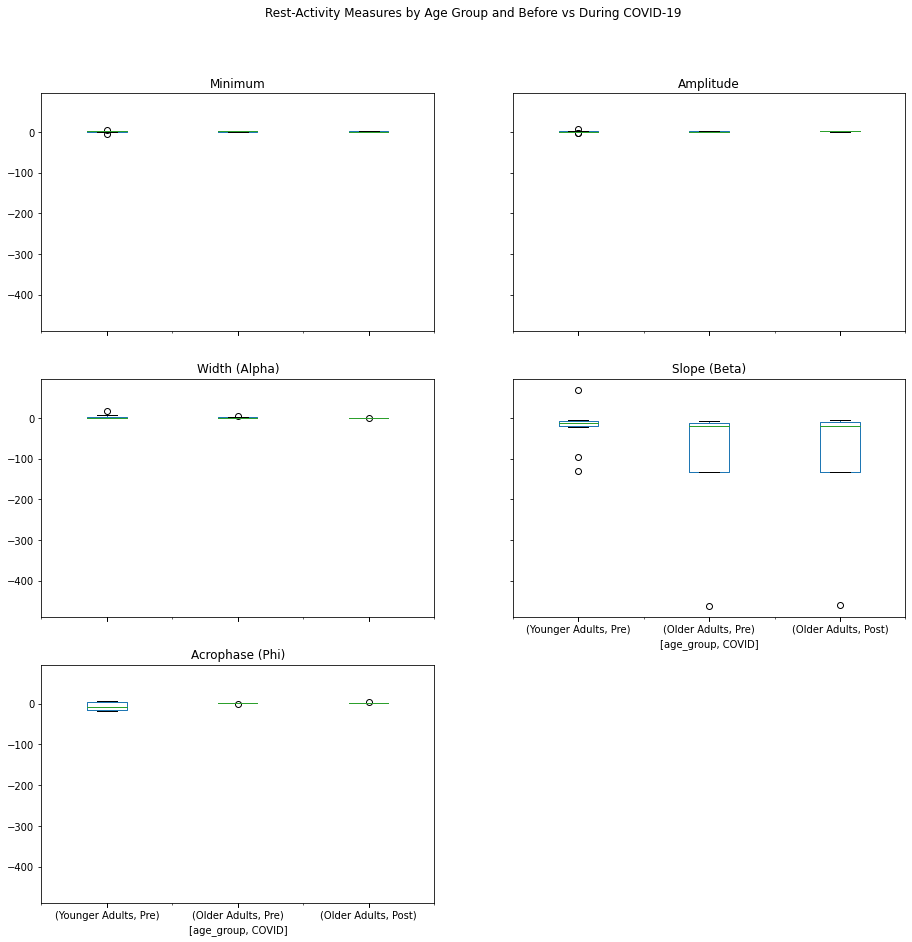

In [28]:
ax = new[['age_group','COVID', 'actmin_10', 'amp_10', 'alpha_10', 'beta_10', 'phi_10']].boxplot(column = ['actmin_10', 'amp_10', 'alpha_10', 'beta_10', 'phi_10'], by = ['age_group','COVID'], figsize = (15, 15), grid = False)
ax[0,0].title.set_text('Minimum')
ax[0,1].title.set_text('Amplitude')
ax[1,0].title.set_text('Width (Alpha)')
ax[1,1].title.set_text('Slope (Beta)')
ax[2,0].title.set_text('Acrophase (Phi)')
plt.suptitle('Rest-Activity Measures by Age Group and Before vs During COVID-19')


Text(0.5, 0.98, 'Rest-Activity Measures in Older Adults Before vs During COVID-19')

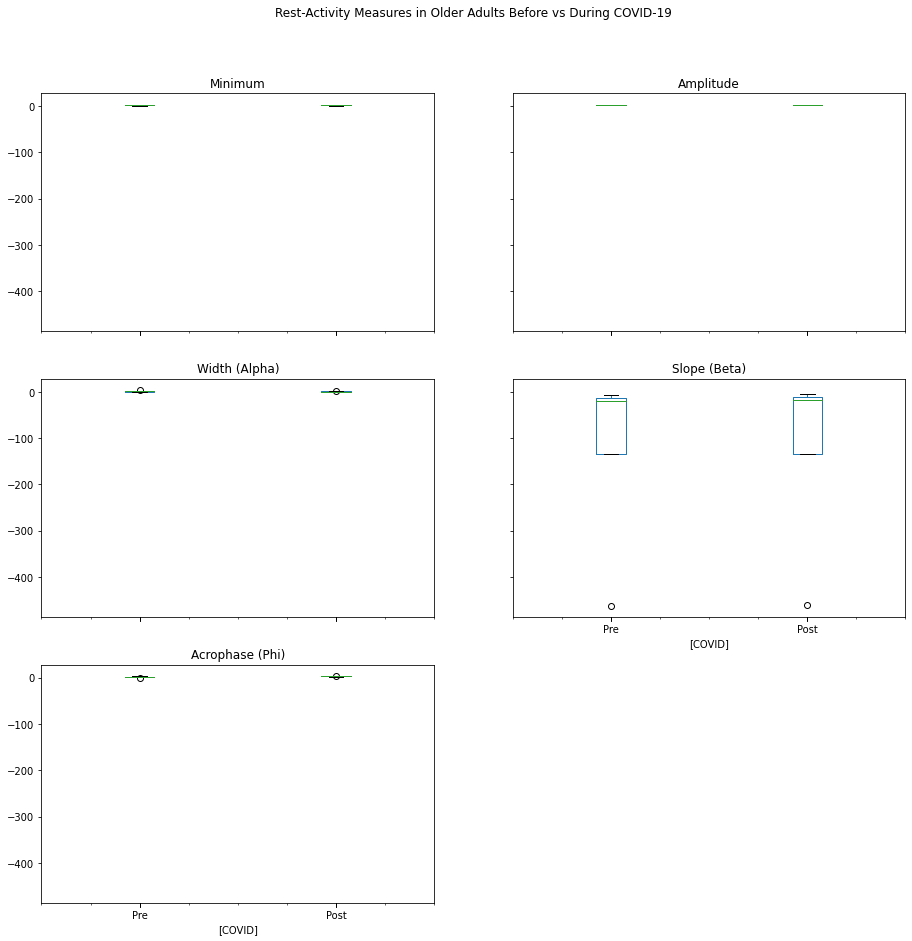

In [29]:
ax = new[new['age_group'] == "Older Adults"][['COVID', 'actmin_10', 'amp_10', 'alpha_10', 'beta_10', 'phi_10']].boxplot(column = ['actmin_10', 'amp_10', 'alpha_10', 'beta_10', 'phi_10'], by = ['COVID'], figsize = (15, 15), grid = False)
ax[0,0].title.set_text('Minimum')
ax[0,1].title.set_text('Amplitude')
ax[1,0].title.set_text('Width (Alpha)')
ax[1,1].title.set_text('Slope (Beta)')
ax[2,0].title.set_text('Acrophase (Phi)')
plt.suptitle('Rest-Activity Measures in Older Adults Before vs During COVID-19')


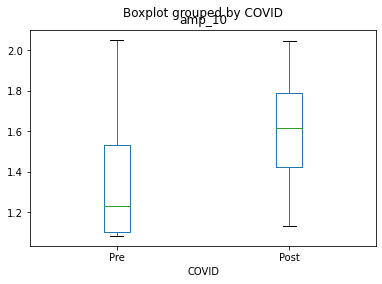

In [30]:
new[new['age_group'] == 'Older Adults'].boxplot('amp_10', by = 'COVID', grid = False)

## PVT and rhythm amplitude

In [31]:
pvt = pd.read_csv(data_dir + 'PVT/pvt_results.csv', na_values = 'nan', keep_default_na = True)
pvt = pvt.set_index('record_id').astype(str)
pvt = pvt.astype(float)
pvt

,Unnamed: 0,RT,FS,NR
record_id,,,,
10011,0.0,0.287571,0.0,0.0
10012,1.0,0.292187,3.0,0.0
10014,2.0,0.343802,6.0,0.0
10023,3.0,0.295579,2.0,0.0
10024,4.0,0.286903,1.0,0.0
10025,5.0,0.245413,1.0,0.0
10033,6.0,0.343700,0.0,0.0
10035,7.0,0.267186,1.0,0.0
10038,8.0,0.270828,2.0,0.0


In [32]:
n = new.join(pvt)
n = n[n['RT'] < 6.5]
ya = n[n['age_group'] == "Younger Adults"]
oa = n[n['age_group'] == "Older Adults"]

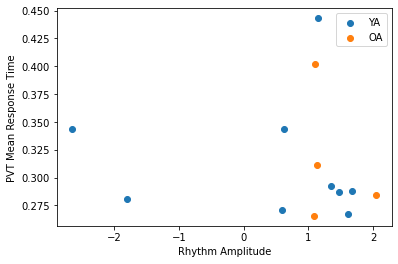

In [33]:
plt.scatter(ya['amp_10'].values, ya['RT'].values, label = "YA")
plt.scatter(oa['amp_10'].values, oa['RT'].values, label = "OA")
plt.xlabel("Rhythm Amplitude")
plt.ylabel("PVT Mean Response Time")
plt.legend()

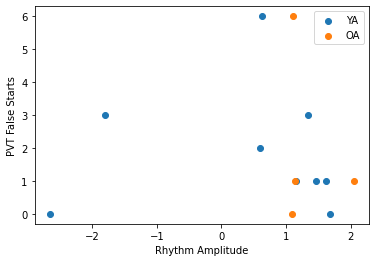

In [34]:
plt.scatter(ya['amp_10'].values, ya['FS'].values, label = "YA")
plt.scatter(oa['amp_10'].values, oa['FS'].values, label = "OA")
plt.xlabel("Rhythm Amplitude")
plt.ylabel("PVT False Starts")
plt.legend()

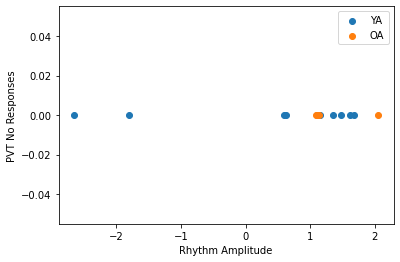

In [35]:
plt.scatter(ya['amp_10'].values, ya['NR'].values, label = "YA")
plt.scatter(oa['amp_10'].values, oa['NR'].values, label = "OA")
plt.xlabel("Rhythm Amplitude")
plt.ylabel("PVT No Responses")
plt.legend()

## PVT and acrophase

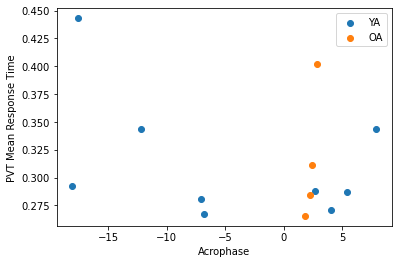

In [37]:
plt.scatter(ya['phi_10'].values, ya['RT'].values, label = "YA")
plt.scatter(oa['phi_10'].values, oa['RT'].values, label = "OA")
plt.xlabel("Acrophase")
plt.ylabel("PVT Mean Response Time")
plt.legend()

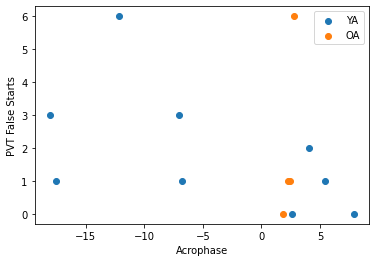

In [38]:
plt.scatter(ya['phi_10'].values, ya['FS'].values, label = "YA")
plt.scatter(oa['phi_10'].values, oa['FS'].values, label = "OA")
plt.xlabel("Acrophase")
plt.ylabel("PVT False Starts")
plt.legend()

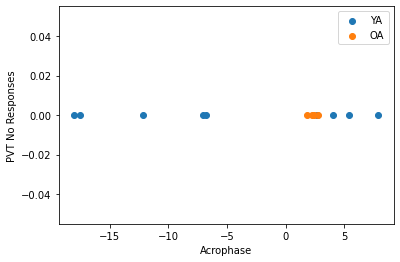

In [40]:
plt.scatter(ya['phi_10'].values, ya['NR'].values, label = "YA")
plt.scatter(oa['phi_10'].values, oa['NR'].values, label = "OA")
plt.xlabel("Acrophase")
plt.ylabel("PVT No Responses")
plt.legend()

## Mood and rhythm amplitude

In [41]:
pre = new[new['COVID'] == "Pre"]
post = new[new['COVID'] == "Post"]

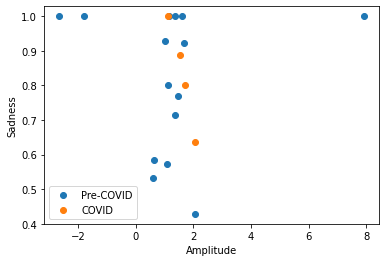

In [42]:
plt.scatter(pre['amp_10'].values, pre['Sadness'].values, label = "Pre-COVID")
plt.scatter(post['amp_10'].values, post['Sadness'].values, label = "COVID")
plt.xlabel("Amplitude")
plt.ylabel("Sadness")
plt.legend()

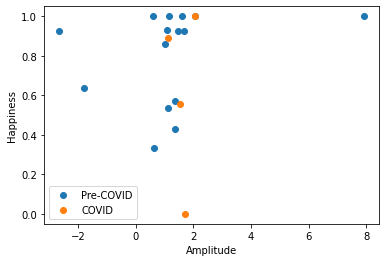

In [43]:
plt.scatter(pre['amp_10'].values, pre['Happiness'].values, label = "Pre-COVID")
plt.scatter(post['amp_10'].values, post['Happiness'].values, label = "COVID")
plt.xlabel("Amplitude")
plt.ylabel("Happiness")
plt.legend()

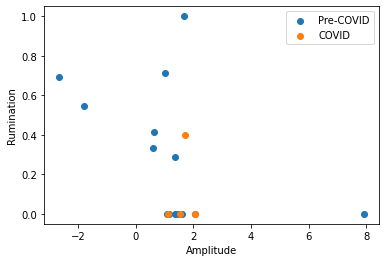

In [44]:
plt.scatter(pre['amp_10'].values, pre['Rumination'].values, label = "Pre-COVID")
plt.scatter(post['amp_10'].values, post['Rumination'].values, label = "COVID")
plt.xlabel("Amplitude")
plt.ylabel("Rumination")
plt.legend()

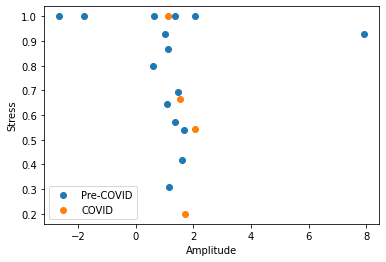

In [45]:
plt.scatter(pre['amp_10'].values, pre['Stress'].values, label = "Pre-COVID")
plt.scatter(post['amp_10'].values, post['Stress'].values, label = "COVID")
plt.xlabel("Amplitude")
plt.ylabel("Stress")
plt.legend()

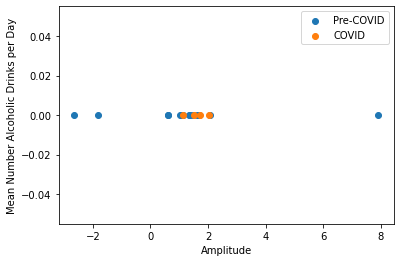

In [46]:
plt.scatter(pre['amp_10'].values, pre['Alcohol'].values, label = "Pre-COVID")
plt.scatter(post['amp_10'].values, post['Alcohol'].values, label = "COVID")
plt.xlabel("Amplitude")
plt.ylabel("Mean Number Alcoholic Drinks per Day")
plt.legend()

Why do I have amplitude values > 2?